In [1]:
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.anova import *
from functools import reduce

In [2]:
# Data set loading

df_file = "/Users/tracysanchezpacheco/Downloads/Impresiones_agentes_virtuales_long.csv"
df = pd.read_csv(df_file, sep= ',')
df.head()

,Item_ID,Item_Category,Agent_ID,Agent_Gender,Agent_Action,Likert,Subject_ID,Edad,Sexo,Pais,Educacion,Area
0,Recordar_10,Recordar,10,Female,Active,2.0,1,22,Mujer,Costa Rica,Universitaria incompleta,Ciencias Sociales
1,Real_10,Real,10,Female,Active,1.0,1,22,Mujer,Costa Rica,Universitaria incompleta,Ciencias Sociales
2,Cálido/a_10,Cálido/a,10,Female,Active,2.0,1,22,Mujer,Costa Rica,Universitaria incompleta,Ciencias Sociales
3,Simpático/a_10,Simpático/a,10,Female,Active,2.0,1,22,Mujer,Costa Rica,Universitaria incompleta,Ciencias Sociales
4,Hábil_10,Hábil,10,Female,Active,1.0,1,22,Mujer,Costa Rica,Universitaria incompleta,Ciencias Sociales


In [3]:
#Average values Agent Gender
display(df.groupby(['Agent_Gender'])['Likert'].describe())
#Average Agent Action
display(df.groupby(['Agent_Action'])['Likert'].describe())
#Average Agent Gender*Action
df.groupby(['Agent_Gender', 'Agent_Action'])['Likert'].describe()

,count,mean,std,min,25%,50%,75%,max
Agent_Gender,,,,,,,,
Female,1811.0,2.815019,1.201066,1.0,2.0,3.0,4.0,5.0
Male,1820.0,2.802198,1.168769,1.0,2.0,3.0,4.0,5.0


,count,mean,std,min,25%,50%,75%,max
Agent_Action,,,,,,,,
Active,1814.0,2.979052,1.185313,1.0,2.0,3.0,4.0,5.0
Passive,1817.0,2.638415,1.159959,1.0,2.0,3.0,3.0,5.0


count      mean       std  min  25%  50%  75%  max
Agent_Gender Agent_Action                                                    
Female       Active        905.0  3.022099  1.187862  1.0  2.0  3.0  4.0  5.0
             Passive       906.0  2.608168  1.178959  1.0  2.0  2.0  3.0  5.0
Male         Active        909.0  2.936194  1.181865  1.0  2.0  3.0  4.0  5.0
             Passive       911.0  2.668496  1.140602  1.0  2.0  3.0  3.0  5.0

In [16]:
filtered_df = df[df['Item_Category'] == 'Competente ']
filtered_df.head()

,Item_ID,Item_Category,Agent_ID,Agent_Gender,Agent_Action,Likert,Subject_ID,Edad,Sexo,Pais,Educacion,Area
5,Competente _10,Competente,10,Female,Active,3.0,1,22,Mujer,Costa Rica,Universitaria incompleta,Ciencias Sociales
15,Competente _30,Competente,30,Female,Passive,2.0,1,22,Mujer,Costa Rica,Universitaria incompleta,Ciencias Sociales
25,Competente _3,Competente,3,Male,Active,5.0,1,22,Mujer,Costa Rica,Universitaria incompleta,Ciencias Sociales
35,Competente _32,Competente,32,Male,Passive,2.0,1,22,Mujer,Costa Rica,Universitaria incompleta,Ciencias Sociales
45,Competente _7,Competente,7,Female,Active,3.0,1,22,Mujer,Costa Rica,Universitaria incompleta,Ciencias Sociales


In [17]:
# Now, perform the groupby and describe operations on the filtered DataFrame

# Average values by Agent Gender
print("Average values by Agent Gender:")
display(filtered_df.groupby(['Agent_Gender'])['Likert'].describe())

# Average values by Agent Action
print("Average values by Agent Action:")
display(filtered_df.groupby(['Agent_Action'])['Likert'].describe())

# Average values by Agent Gender and Action
print("Average values by Agent Gender and Action:")
display(filtered_df.groupby(['Agent_Gender', 'Agent_Action'])['Likert'].describe())

Average values by Agent Gender:


,count,mean,std,min,25%,50%,75%,max
Agent_Gender,,,,,,,,
Female,181.0,2.966851,1.134806,1.0,2.0,3.0,4.0,5.0
Male,184.0,3.103261,1.108926,1.0,2.0,3.0,4.0,5.0


Average values by Agent Action:


,count,mean,std,min,25%,50%,75%,max
Agent_Action,,,,,,,,
Active,184.0,3.244565,1.116186,1.0,3.0,3.0,4.0,5.0
Passive,181.0,2.823204,1.091234,1.0,2.0,3.0,4.0,5.0


Average values by Agent Gender and Action:


count      mean       std  min  25%  50%  75%  max
Agent_Gender Agent_Action                                                    
Female       Active         91.0  3.241758  1.128821  1.0  2.0  3.0  4.0  5.0
             Passive        90.0  2.688889  1.077288  1.0  2.0  3.0  3.0  5.0
Male         Active         93.0  3.247312  1.109797  1.0  3.0  3.0  4.0  5.0
             Passive        91.0  2.956044  1.094553  1.0  2.0  3.0  4.0  5.0

In [18]:
df['Item_Category'].unique()

array(['Recordar', 'Real', 'Cálido/a', 'Simpático/a', 'Hábil',
       'Competente ', 'Independiente', 'Decidido/a', 'Generoso/a',
       'Servicial', 'Real '], dtype=object)

In [ ]:
display(filtered_df.groupby(['Agent_Gender', 'Agent_Action'])['Likert'].describe())

In [49]:
Real = df[df['Item_Category'].isin(['Real',  'Real '])]
Recordar = df[df['Item_Category'].isin(['Recordar'])]

In [52]:
# Average values by Agent Gender
print("Average values by Agent Gender:")
display(Recordar.groupby(['Agent_Gender'])['Likert'].describe())

# Average values by Agent Action
print("Average values by Agent Action:")
display(Recordar.groupby(['Agent_Action'])['Likert'].describe())

# Average values by Agent Gender and Action
print("Average values by Agent Gender and Action:")
display(Recordar.groupby(['Agent_Gender', 'Agent_Action'])['Likert'].describe())

Average values by Agent Gender:


,count,mean,std,min,25%,50%,75%,max
Agent_Gender,,,,,,,,
Female,180.0,2.605556,1.288094,1.0,2.0,2.0,3.0,5.0
Male,182.0,2.840659,1.231222,1.0,2.0,3.0,3.0,5.0


Average values by Agent Action:


,count,mean,std,min,25%,50%,75%,max
Agent_Action,,,,,,,,
Active,182.0,2.835165,1.237211,1.0,2.0,3.0,3.75,5.0
Passive,180.0,2.611111,1.283278,1.0,2.0,2.0,3.00,5.0


Average values by Agent Gender and Action:


count      mean       std  min  25%  50%  75%  max
Agent_Gender Agent_Action                                                    
Female       Active         90.0  2.700000  1.212760  1.0  2.0  3.0  3.0  5.0
             Passive        90.0  2.511111  1.359481  1.0  1.0  2.0  3.0  5.0
Male         Active         92.0  2.967391  1.253137  1.0  2.0  3.0  4.0  5.0
             Passive        90.0  2.711111  1.201539  1.0  2.0  3.0  3.0  5.0

In [23]:
# Step 1: Filter the DataFrame for specified Action and Social categories
filtered_df_Action = df[df['Item_Category'].isin(['Competente', 'Independiente', 'Decidido/a', 'Hábil'])]
filtered_df_Social = df[df['Item_Category'].isin(['Cálido/a', 'Simpático/a', 'Generoso/a', 'Servicial'])]

# Step 2: Calculate the average Likert score for each Subject_ID within the filtered DataFrames
average_likert_Action = filtered_df_Action.groupby(['Subject_ID','Agent_Gender', 'Agent_Action'])['Likert'].mean().reset_index(name='Average_Likert_Action')
average_likert_Social = filtered_df_Social.groupby(['Subject_ID','Agent_Gender', 'Agent_Action'])['Likert'].mean().reset_index(name='Average_Likert_Social')

In [29]:
merged_averages = pd.merge(average_likert_Action, average_likert_Social, 
                           on=['Subject_ID', 'Agent_Gender', 'Agent_Action'], 
                           how='outer')

In [31]:
merged_averages

,Subject_ID,Agent_Gender,Agent_Action,Average_Likert_Action,Average_Likert_Social
0,1,Female,Active,3.571429,3.10
1,1,Female,Passive,3.000000,2.15
2,1,Male,Active,3.800000,2.40
3,1,Male,Passive,2.933333,2.95
4,2,Female,Active,1.600000,1.60
...,...,...,...,...,...
71,18,Male,Passive,3.666667,3.10
72,19,Female,Active,2.000000,1.85
73,19,Female,Passive,1.533333,1.45
74,19,Male,Active,2.200000,1.85


Text(0, 0.5, 'Average likert rating across all social items')

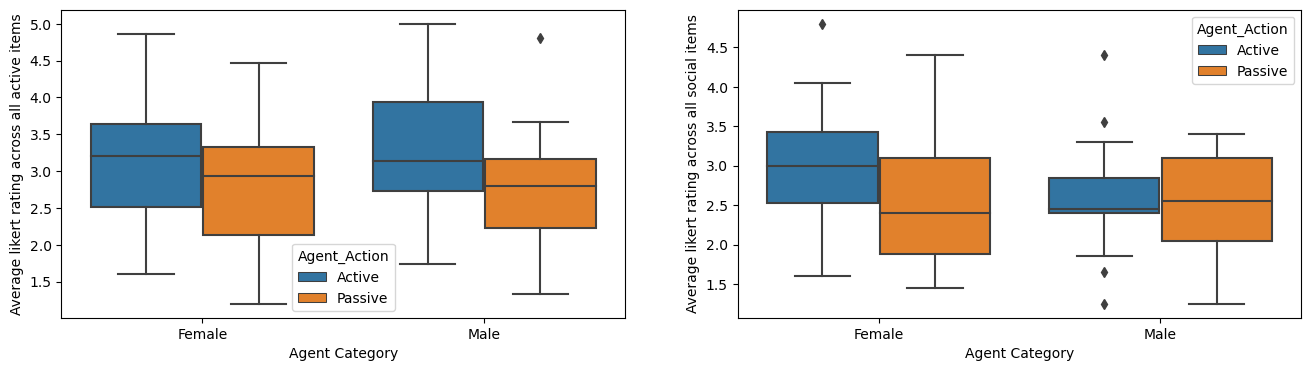

In [42]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,4))
sns.boxplot(data= merged_averages, x='Agent_Gender', hue='Agent_Action', y='Average_Likert_Action',  ax=axes[0])
axes[0].set_xlabel('Agent Category')
axes[0].set_ylabel('Average likert rating across all active items')

sns.boxplot(data= merged_averages, x='Agent_Gender', hue='Agent_Action', y='Average_Likert_Social',  ax=axes[1])
axes[1].set_xlabel('Agent Category')
axes[1].set_ylabel('Average likert rating across all social items')


In [45]:
print("Average values by Agent Gender:")
display(merged_averages.groupby(['Agent_Gender'])['Average_Likert_Action'].describe())

# Average values by Agent Action
print("Average values by Agent Action:")
display(merged_averages.groupby(['Agent_Action'])['Average_Likert_Action'].describe())

# Average values by Agent Gender and Action
print("Average values by Agent Gender and Action:")
display(merged_averages.groupby(['Agent_Gender', 'Agent_Action'])['Average_Likert_Action'].describe())

Average values by Agent Gender:


,count,mean,std,min,25%,50%,75%,max
Agent_Gender,,,,,,,,
Female,38.0,2.949132,0.866219,1.200000,2.283333,3.0,3.561905,4.857143
Male,38.0,3.028509,0.861949,1.333333,2.600000,2.9,3.333333,5.000000


Average values by Agent Action:


,count,mean,std,min,25%,50%,75%,max
Agent_Action,,,,,,,,
Active,38.0,3.219612,0.841951,1.6,2.683333,3.166667,3.716667,5.0
Passive,38.0,2.758030,0.823552,1.2,2.150000,2.833333,3.183333,4.8


Average values by Agent Gender and Action:


count      mean       std       min       25%  \
Agent_Gender Agent_Action                                                  
Female       Active         19.0  3.157644  0.835257  1.600000  2.516667   
             Passive        19.0  2.740621  0.867708  1.200000  2.133333   
Male         Active         19.0  3.281579  0.866825  1.733333  2.733333   
             Passive        19.0  2.775439  0.800374  1.333333  2.233333   

                                50%       75%       max  
Agent_Gender Agent_Action                                
Female       Active        3.200000  3.633333  4.857143  
             Passive       2.933333  3.333333  4.466667  
Male         Active        3.133333  3.933333  5.000000  
             Passive       2.800000  3.166667  4.800000

In [46]:
print("Average values by Agent Gender:")
display(merged_averages.groupby(['Agent_Gender'])['Average_Likert_Social'].describe())

# Average values by Agent Action
print("Average values by Agent Action:")
display(merged_averages.groupby(['Agent_Action'])['Average_Likert_Social'].describe())

# Average values by Agent Gender and Action
print("Average values by Agent Gender and Action:")
display(merged_averages.groupby(['Agent_Gender', 'Agent_Action'])['Average_Likert_Social'].describe())

Average values by Agent Gender:


,count,mean,std,min,25%,50%,75%,max
Agent_Gender,,,,,,,,
Female,38.0,2.773753,0.843319,1.45,2.1125,2.725,3.2875,4.8
Male,38.0,2.568144,0.659183,1.25,2.2125,2.475,3.0000,4.4


Average values by Agent Action:


,count,mean,std,min,25%,50%,75%,max
Agent_Action,,,,,,,,
Active,38.0,2.809003,0.767249,1.25,2.400,2.725,3.088158,4.8
Passive,38.0,2.532895,0.734574,1.25,1.925,2.450,3.100000,4.4


Average values by Agent Gender and Action:


count      mean       std   min    25%   50%  \
Agent_Gender Agent_Action                                                 
Female       Active         19.0  3.023823  0.797287  1.60  2.525  3.00   
             Passive        19.0  2.523684  0.833187  1.45  1.875  2.40   
Male         Active         19.0  2.594183  0.690622  1.25  2.400  2.45   
             Passive        19.0  2.542105  0.644046  1.25  2.050  2.55   

                                75%  max  
Agent_Gender Agent_Action                 
Female       Active        3.425000  4.8  
             Passive       3.100000  4.4  
Male         Active        2.844737  4.4  
             Passive       3.100000  3.4

In [55]:
Recordar.dropna(axis=0,  inplace=True)

/var/folders/3p/lxg47mnx0ks_st66vkzkx1640000gn/T/ipykernel_44732/1309980371.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Recordar.dropna(axis=0,  inplace=True)


In [57]:
Recordar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 362 entries, 0 to 3790
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Item_ID        362 non-null    object 
 1   Item_Category  362 non-null    object 
 2   Agent_ID       362 non-null    int64  
 3   Agent_Gender   362 non-null    object 
 4   Agent_Action   362 non-null    object 
 5   Likert         362 non-null    float64
 6   Subject_ID     362 non-null    int64  
 7   Edad           362 non-null    int64  
 8   Sexo           362 non-null    object 
 9   Pais           362 non-null    object 
 10  Educacion      362 non-null    object 
 11  Area           362 non-null    object 
dtypes: float64(1), int64(3), object(8)
memory usage: 36.8+ KB


In [66]:
Real.info()

<class 'pandas.core.frame.DataFrame'>
Index: 380 entries, 1 to 3791
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Item_ID        380 non-null    object 
 1   Item_Category  380 non-null    object 
 2   Agent_ID       380 non-null    int64  
 3   Agent_Gender   380 non-null    object 
 4   Agent_Action   380 non-null    object 
 5   Likert         371 non-null    float64
 6   Subject_ID     380 non-null    int64  
 7   Edad           380 non-null    int64  
 8   Sexo           380 non-null    object 
 9   Pais           380 non-null    object 
 10  Educacion      380 non-null    object 
 11  Area           380 non-null    object 
dtypes: float64(1), int64(3), object(8)
memory usage: 38.6+ KB


In [59]:
Recordar.Agent_Gender.unique()

array(['Female', 'Male'], dtype=object)

In [68]:
Real.dropna(axis=0,  inplace=True)

/var/folders/3p/lxg47mnx0ks_st66vkzkx1640000gn/T/ipykernel_44732/3622818355.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Real.dropna(axis=0,  inplace=True)


In [60]:
Recordar.Agent_Action.unique()

array(['Active', 'Passive'], dtype=object)

In [62]:
Mujeres_Activas = Recordar[(Recordar['Agent_Gender'] == 'Female') & (Recordar['Agent_Action'] == 'Active')]['Likert'].values
Hombre_Activos = Recordar[(Recordar['Agent_Gender'] == 'Male') & (Recordar['Agent_Action'] == 'Active')]['Likert'].values
Mujeres_Pasivas = Recordar[(Recordar['Agent_Gender'] == 'Female') & (Recordar['Agent_Action'] == 'Passive')]['Likert'].values
Hombres_Pasivos= Recordar[(Recordar['Agent_Gender'] == 'Male') & (Recordar['Agent_Action'] == 'Passive')]['Likert'].values

In [63]:
# Kruskal-Wallis H-test
from scipy.stats import kruskal
stat, p = kruskal(Mujeres_Activas, Hombre_Activos, Mujeres_Pasivas, Hombres_Pasivos)

print(f'Statistic: {stat}')
print(f'P-value: {p}')

Statistic: 7.821793839264033
P-value: 0.04984190387259011


In [69]:
Mujeres_Activas = Real[(Real['Agent_Gender'] == 'Female') & (Real['Agent_Action'] == 'Active')]['Likert'].values
Hombre_Activos = Real[(Real['Agent_Gender'] == 'Male') & (Real['Agent_Action'] == 'Active')]['Likert'].values
Mujeres_Pasivas = Real[(Real['Agent_Gender'] == 'Female') & (Real['Agent_Action'] == 'Passive')]['Likert'].values
Hombres_Pasivos= Real[(Real['Agent_Gender'] == 'Male') & (Real['Agent_Action'] == 'Passive')]['Likert'].values

In [70]:
stat, p = kruskal(Mujeres_Activas, Hombre_Activos, Mujeres_Pasivas, Hombres_Pasivos)

print(f'Statistic: {stat}')
print(f'P-value: {p}')

Statistic: 6.254937722307005
P-value: 0.09984468263835114


In [72]:
filtered_df_Action.dropna(axis=0,  inplace=True)

/var/folders/3p/lxg47mnx0ks_st66vkzkx1640000gn/T/ipykernel_44732/351359690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_Action.dropna(axis=0,  inplace=True)


In [75]:
filtered_df_Social.dropna(axis=0,  inplace=True)

/var/folders/3p/lxg47mnx0ks_st66vkzkx1640000gn/T/ipykernel_44732/1564855161.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_Social.dropna(axis=0,  inplace=True)


In [73]:
Mujeres_Activas = filtered_df_Action [(filtered_df_Action ['Agent_Gender'] == 'Female') & (filtered_df_Action ['Agent_Action'] == 'Active')]['Likert'].values
Hombre_Activos = filtered_df_Action [(filtered_df_Action ['Agent_Gender'] == 'Male') & (filtered_df_Action ['Agent_Action'] == 'Active')]['Likert'].values
Mujeres_Pasivas = filtered_df_Action [(filtered_df_Action ['Agent_Gender'] == 'Female') & (filtered_df_Action ['Agent_Action'] == 'Passive')]['Likert'].values
Hombres_Pasivos= filtered_df_Action [(filtered_df_Action ['Agent_Gender'] == 'Male') & (filtered_df_Action ['Agent_Action'] == 'Passive')]['Likert'].values

In [74]:
stat, p = kruskal(Mujeres_Activas, Hombre_Activos, Mujeres_Pasivas, Hombres_Pasivos)

print(f'Statistic: {stat}')
print(f'P-value: {p}')

Statistic: 46.960994159454984
P-value: 3.542644662685281e-10


In [77]:
Mujeres_Activas = filtered_df_Social [(filtered_df_Social ['Agent_Gender'] == 'Female') & (filtered_df_Social ['Agent_Action'] == 'Active')]['Likert'].values
Hombre_Activos = filtered_df_Social [(filtered_df_Social ['Agent_Gender'] == 'Male') & (filtered_df_Social ['Agent_Action'] == 'Active')]['Likert'].values
Mujeres_Pasivas = filtered_df_Social [(filtered_df_Social ['Agent_Gender'] == 'Female') & (filtered_df_Social ['Agent_Action'] == 'Passive')]['Likert'].values
Hombres_Pasivos= filtered_df_Social [(filtered_df_Social ['Agent_Gender'] == 'Male') & (filtered_df_Social ['Agent_Action'] == 'Passive')]['Likert'].values

In [78]:
stat, p = kruskal(Mujeres_Activas, Hombre_Activos, Mujeres_Pasivas, Hombres_Pasivos)

print(f'Statistic: {stat}')
print(f'P-value: {p}')

Statistic: 46.11580885008653
P-value: 5.358867196603545e-10
